In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv') 

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Cleaning

In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 87396, dtype: bool

In [6]:
# Replace missing values with a default value (e.g. 0)
df.fillna(0, inplace=True)

In [7]:
# Remove irrelevant columns
df.drop(['company', 'agent'], axis=1, inplace=True)

In [9]:
print(df[['company']].to_string(index=False)) 

KeyError: ignored

In [10]:
# Convert data type of a column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [15]:
df['reservation_status_date'].dtypes

dtype('<M8[ns]')

In [16]:
# Standardize column names
df.rename(columns={'children': 'num_children'}, inplace=True)

In [38]:
df['num_children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: num_children, Length: 87396, dtype: float64

In [21]:
# Detect outliers in a column
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['adr'] < Q1 - 1.5 * IQR) | (df['adr'] > Q3 + 1.5 * IQR)

print(df.loc[outliers,'adr'])

396       230.67
523       249.00
526       241.50
584       240.64
641       233.00
           ...  
119152    233.00
119247    235.00
119289    236.33
119339    229.00
119365    266.75
Name: adr, Length: 2490, dtype: float64


In [22]:
# Replace outliers with a default value (e.g. median)
df.loc[outliers, 'adr'] = df['adr'].median()

In [23]:
print(df.loc[outliers,'adr'])

396       98.1
523       98.1
526       98.1
584       98.1
641       98.1
          ... 
119152    98.1
119247    98.1
119289    98.1
119339    98.1
119365    98.1
Name: adr, Length: 2490, dtype: float64


In [29]:
# Remove leading/trailing spaces from string columns
df['country'] = df['country'].str.strip()

In [28]:
df['country'].str.len()

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
119385    3.0
119386    3.0
119387    3.0
119388    3.0
119389    3.0
Name: country, Length: 87396, dtype: float64

In [33]:
# Replace inconsistent values in a column
df['market_segment'] = df['market_segment'].replace('Undefined', 'Other')


In [35]:
df.loc[df['market_segment'] == 'Other']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04


In [ ]:
# Remove special characters from string columns
df['reserved_room_type'] = df['reserved_room_type'].str.replace('/', '')

In [37]:
df.loc[df['reserved_room_type'].str.contains('/')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
# Convert the date columns to datetime format
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [ ]:
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# EDA

In [ ]:
# print the first 5 rows of the dataset
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

In [ ]:
# get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  num_children                    87396 non-null  float64       
 11  b

In [ ]:
# check for missing values
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
num_children                        0
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
# get descriptive statistics for the numerical variables
print(df.describe())

        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   

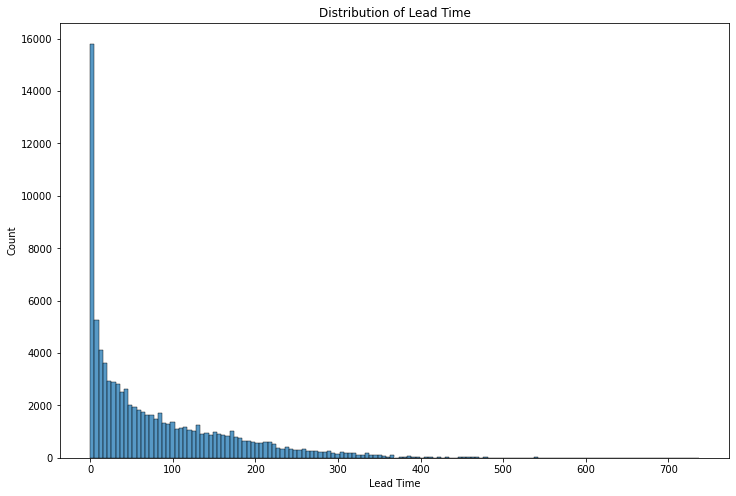

In [ ]:
# visualize the distribution of numerical variables
plt.figure(figsize=(12,8))
sns.histplot(df['lead_time'])
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.show()

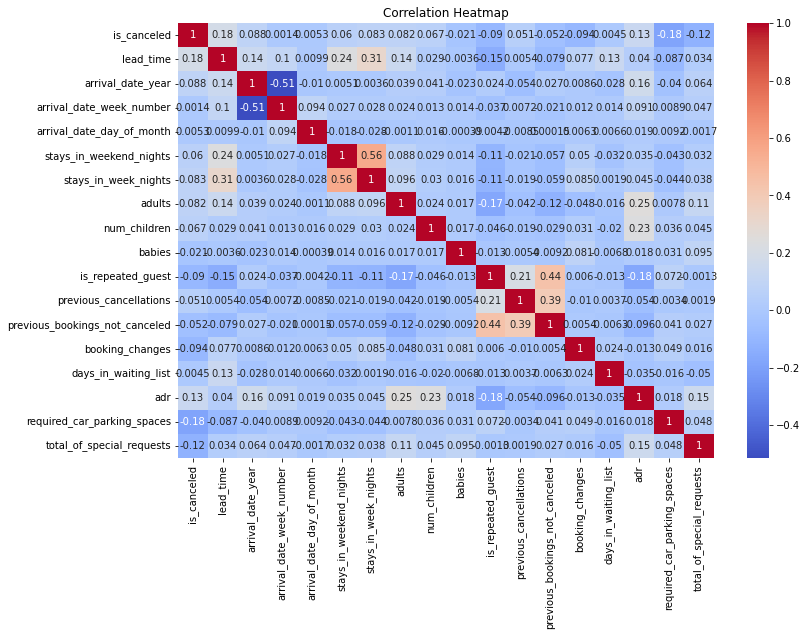

In [ ]:
# visualize the correlation between numerical variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

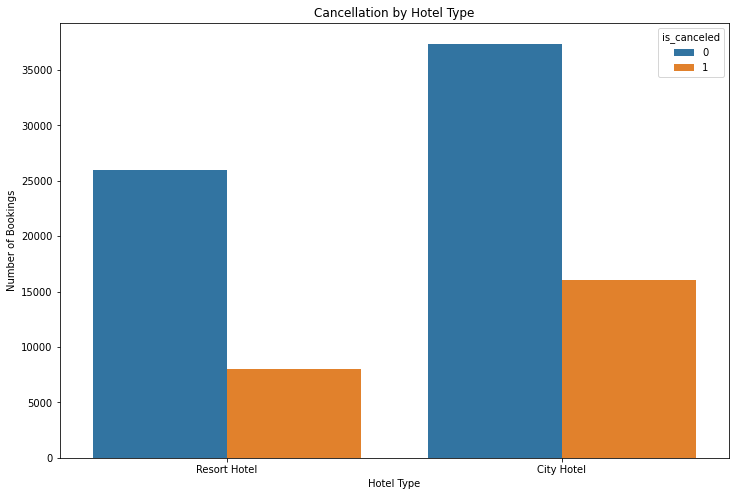

In [ ]:
# explore the distribution of categorical variables
plt.figure(figsize=(12,8))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

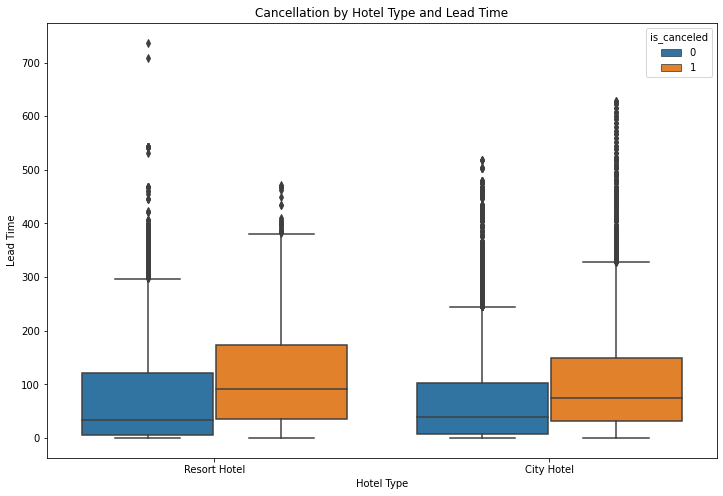

In [ ]:
# explore the relationship between categorical and numerical variables
plt.figure(figsize=(12,8))
sns.boxplot(x='hotel', y='lead_time', hue='is_canceled', data=df)
plt.title('Cancellation by Hotel Type and Lead Time')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.show()

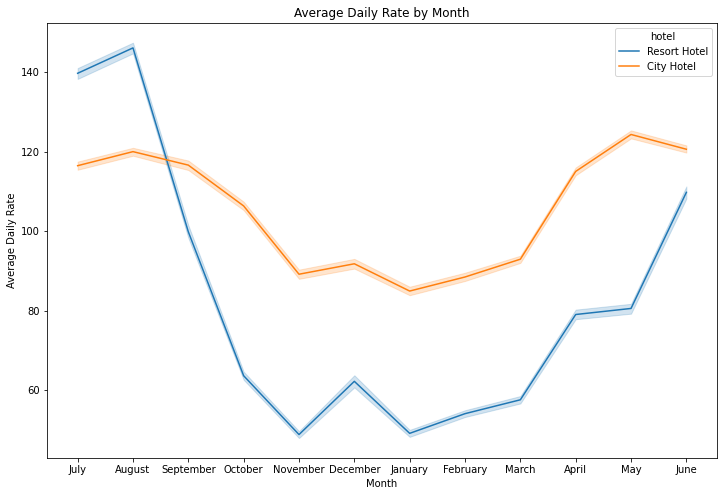

In [ ]:
# explore the average daily rate of the bookings
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df)
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

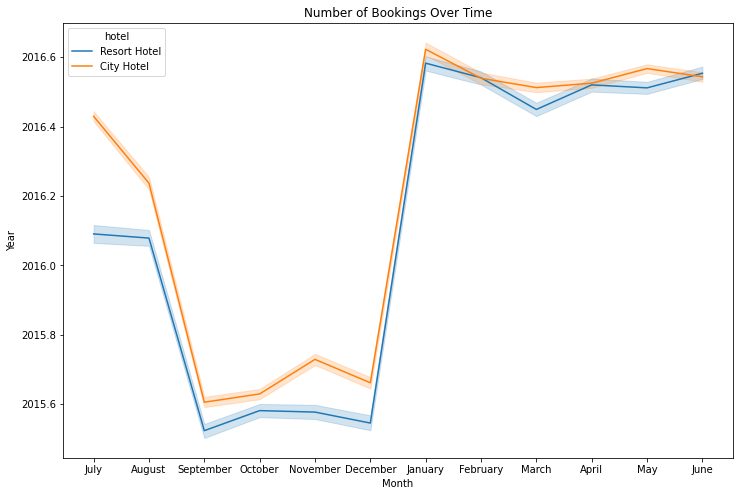

In [ ]:
# explore the number of bookings over time
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_month', y='arrival_date_year', hue='hotel', data=df)
plt.title('Number of Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()